https://towardsdatascience.com/how-to-model-time-series-data-with-linear-regression-cd94d1d901c0
Check: 
1. Linearity between dependant and independant variable,
2. predicted values are independant
3. normality of residuals, residual plots, 
4. multicolinearity: Independant variables are not strogly correlated
5. homoscedasticity:constant variance in residual plot.
6. look at variance of influence factor


In [84]:
from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns

In [85]:
df = sm.datasets.get_rdataset("Duncan", "carData").data
df.head(5)

,type,income,education,prestige
accountant,prof,62,86,82
pilot,prof,72,76,83
architect,prof,75,92,90
author,prof,55,90,76
chemist,prof,64,86,90


R-squared=low=dependant variable is not well described by filleted line. 
too many independant variable may produce high R-squared but may cause overfitting.
F-stat: low: independent varible did not explain dependant well.
A good F-statistic and poor t-statistic indicates collinearity

Hypothesis TEST for coefficients
H0=coef==0

Ha=coef!=0



In [90]:
import statsmodels.formula.api as smf
model=smf.ols('prestige~income+education',data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               prestige   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     101.2
Date:                Sun, 11 Jul 2021   Prob (F-statistic):           8.65e-17
Time:                        23:17:50   Log-Likelihood:                -178.98
No. Observations:                  45   AIC:                             364.0
Df Residuals:                      42   BIC:                             369.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.0647      4.272     -1.420      0.163     -14.686       2.556
income         0.5987      0.120      5.003      0.000       0.357       0.840
education      0.5458      0.098      5.555      0.000       0.348       0.744
==============================================================================
Omnibus:                        1.279   Durbin-Watson:                   1.458
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.520
Skew:                           0.155   Prob(JB):                        0.771
Kurtosis:                       3.426   Cond. No.                         163.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
import matplotlib.pyplot as plt
import numpy as np
pred=model.predict(df[["income","education"]])
y_pred=np.array(pred)
y=np.array(df[["prestige"]]).reshape(1,-1)
y

array([[82, 83, 90, 76, 90, 87, 93, 90, 52, 88, 57, 89, 97, 59, 73, 38,
        76, 81, 45, 92, 39, 34, 41, 16, 33, 53, 67, 57, 26, 29, 10, 15,
        19, 10, 13, 24, 20,  7,  3, 16,  6, 11,  8, 41, 10]])

Linearity TEST and residuals normality

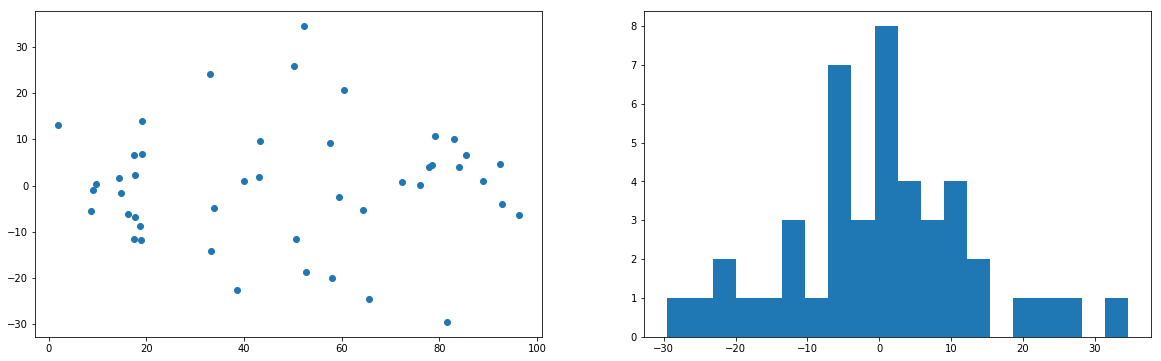

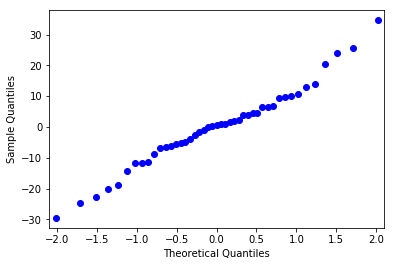

In [92]:
fig,ax=plt.subplots(nrows=1,ncols=2, figsize=(20,6))
residuals=np.array(model.resid)
#print(residuals)
#print(residuals)
ax[0].scatter(pred,residuals)
ax[1].hist(residuals, bins=20)
sm.qqplot(residuals)
plt.show()

TESTs multicolinearity among independent variables

In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
X=df[["income","education"]]
VIF=[]
for i in range(len(X.columns)):
    vf=variance_inflation_factor(X.values,i)
    VIF.append(vf)
var_inf=pd.DataFrame()    
var_inf["feature"]=X.columns
var_inf["VIF"]=VIF
var_inf

,feature,VIF
0,income,7.681387
1,education,7.681387
